# 第3章 時系列予測のための数理モデル

## 3.2 ARIMA系モデル

### 3.2.2 AutoARIMA（自動ARIMA）

In [1]:
#
# code 3.1
#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pmdarima.datasets import load_airpassengers

# データの読み込み
data = load_airpassengers()
df_ap = pd.DataFrame(data, columns=['y'])
df_ap.index = pd.date_range(
    start='1949-01-01', # 開始月
    periods=len(df_ap), # 期数
    freq='M'            # 間隔（Mは月を意味する）
)

In [2]:
#
# code 3.2
#

from pmdarima import auto_arima

# AutoARIMAモデルを使い学習
model = auto_arima(
    df_ap['y'],    # 学習データ
    seasonal=True, # 季節性を考慮する
    m=12,          # 季節周期
    trace=True     # 次数の自動探索経過の表示
)

# モデルの概要を出力 (次数と係数、切片のみ)
sum_model = model.summary() 
print(sum_model.tables[1])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=3.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.42 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=2.08 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.10 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.50 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.10 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=1.42 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=1.50 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=3.12 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

In [3]:
#
# code 3.3
#

# 予測結果をプロットする関数
def plot_prediction_results(
    y,                  # 実際の観測値
    fitted,             # 学習データ期間の予測値
    forecast=None,      # 将来予測の予測値
    conf=None,          # 将来予測の予測区間
):
    # 実測値のプロット
    plt.figure(figsize=(10, 5))
    plt.plot(
        y.index,        # 横軸
        y.values,       # 縦軸 
        label='Actual'  # ラベル名
    )
    # 学習データ期間の予測値のプロット
    plt.plot(
        fitted.index,   # 横軸
        fitted.values,  # 縦軸
        label='Fitted', # ラベル名
        color='green',  # 線の色
        linestyle=':'   # 線のスタイル
    )
    # 将来の予測値のプロット
    if forecast is not None:
        plt.plot(
            forecast.index,   # 横軸
            forecast,         # 縦軸
            label='Forecast', # ラベル名
            color='red',      # 線の色
            linestyle='--'    # 線のスタイル
        )
    # 将来の予測区間のプロット
    if conf is not None:
        plt.fill_between(
            forecast.index,            # 横軸
            conf[:, 0],                # 塗りつぶし幅の下限
            conf[:, 1],                # 塗りつぶし幅の上限
            color='red',               # 塗りつぶし幅の色
            alpha=0.1,                 # 塗りつぶし幅の透明度
            label='Predicted Interval' # ラベル名
        )
    plt.legend() # 凡例を表示
    plt.show()   # グラフを表示

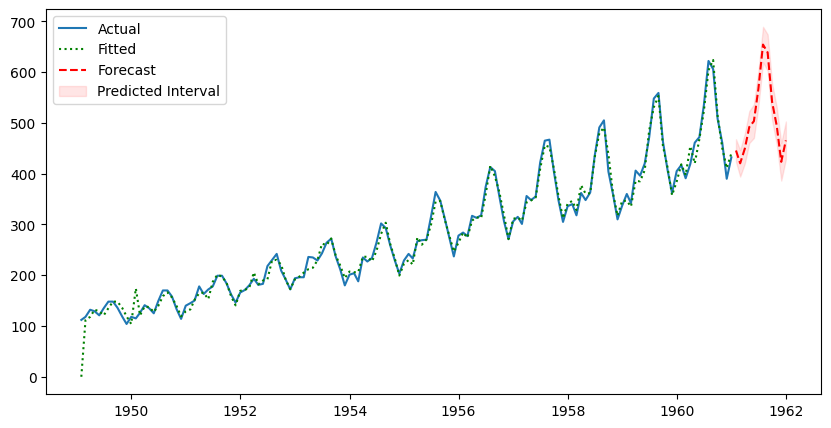

In [4]:
#
# code 3.4
#

# 学習データ期間の予測値を取得
fitted = model.predict_in_sample()

# 将来12か月間の予測（予測区間付き）
forecast, conf = model.predict(
    n_periods=12,         # 予測期間（12ヶ月分）
    return_conf_int=True, # 予測区間を返す
    alpha=0.05,           # 予測区間の信頼水準（95%予測区間）
)

# 結果をプロット
plot_prediction_results(df_ap.y, fitted, forecast, conf)

## 3.3 時系列回帰の数理モデル

### 3.3.2 見せかけの回帰問題

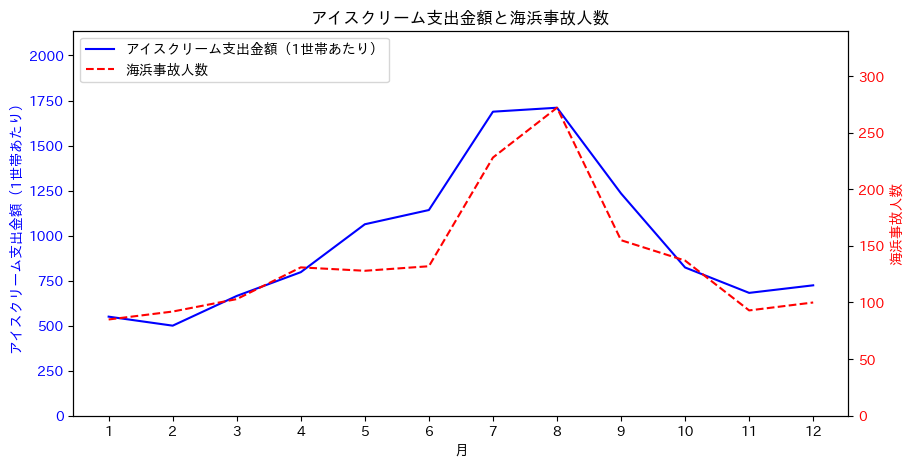

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# データの読み込み
df_icecream = pd.read_csv(
    'icecream.csv', 
    index_col='month'
).sort_index()

# 図と軸を設定
fig, ax1 = plt.subplots(figsize=(10, 5))

# カラー設定
color_icecream = 'blue'  # アイスクリームの色
color_drowning = 'red'   # 溺死事故の色

# アイスクリームの販売個数をプロット
ax1.set_xlabel('月')
ax1.set_ylabel(
    'アイスクリーム支出金額（1世帯あたり）', 
    color=color_icecream
)
ax1.plot(
    df_icecream.index, 
    df_icecream['ice_cream_sales'], 
    color=color_icecream, 
    label='アイスクリーム支出金額（1世帯あたり）'
)
ax1.tick_params(axis='y', labelcolor=color_icecream)          # 軸ラベルの色を設定
ax1.set_xticks(df_icecream.index)                             # 横軸メモリの設定
ax1.set_ylim(0, df_icecream['ice_cream_sales'].max() * 1.25)  # 縦軸メモリの設定

# 死亡事故数に対する軸を追加
ax2 = ax1.twinx()
ax2.set_ylabel('海浜事故人数', color=color_drowning)
ax2.plot(
    df_icecream.index, 
    df_icecream['deaths_drowning'], 
    color=color_drowning, 
    linestyle='--', 
    label='海浜事故人数'
)
ax2.tick_params(axis='y', labelcolor=color_drowning)           # 横軸メモリの設定
ax2.set_ylim(0, df_icecream['deaths_drowning'].max() * 1.25)   # 縦軸メモリの設定

# 凡例作成
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# タイトル追加
plt.title('アイスクリーム支出金額と海浜事故人数')

# グラフ描画
plt.show()

In [6]:
#
# code 3.5
#

from statsmodels.formula.api import ols

# データの読み込み
df = pd.read_csv('icecream.csv')

# 線形回帰モデルの構築
# 目的変数: deaths_drowning（海浜事故人数）
# 説明変数: ice_cream_sales（アイスクリーム支出金額）
model = ols('deaths_drowning ~ ice_cream_sales', data=df).fit()

print(model.summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.8875     15.170      0.718      0.489     -22.914      44.689
ice_cream_sales     0.1317      0.015      9.049      0.000       0.099       0.164


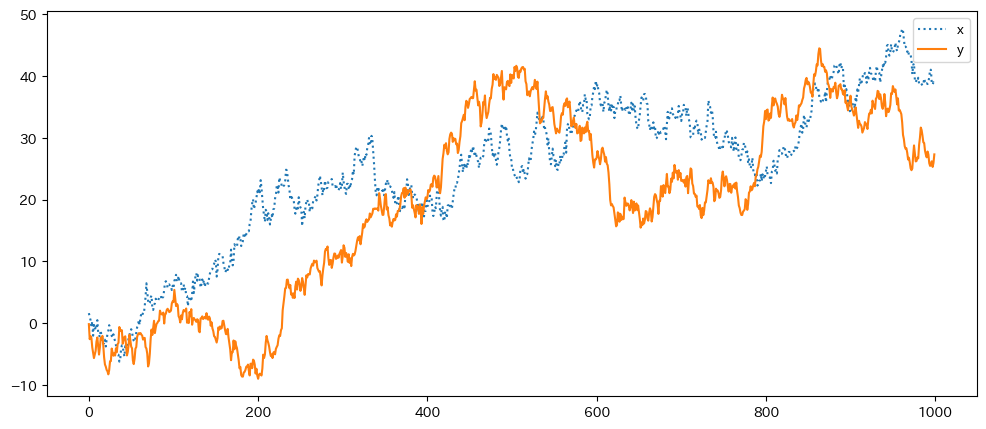

ADF test p-value for x: 0.4240059878971635
ADF test p-value for y: 0.5663944164336069


In [7]:
#
# code 3.6
#

from statsmodels.tsa.stattools import adfuller

# データ生成
n = 1000
np.random.seed(1)
x = np.cumsum(np.random.normal(0, 1, n))
y = np.cumsum(np.random.normal(0, 1, n))

# グラフ描画
plt.figure(figsize=(12, 5))
plt.plot(x, label='x', linestyle=':') 
plt.plot(y, label='y')
plt.legend()
plt.show()

# ADF検定（単位根検定）
print("ADF test p-value for x:", adfuller(x)[1])
print("ADF test p-value for y:", adfuller(y)[1])

In [8]:
#
# code 3.7
#

from statsmodels.formula.api import ols

# データフレーム作成
df = pd.DataFrame({'x': x, 'y': y})

# 線形回帰モデルの構築
model = ols('y ~ x', data=df).fit()

print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8686      0.675     -5.731      0.000      -5.193      -2.544
x              0.9554      0.025     38.657      0.000       0.907       1.004


### 3.3.5 時系列特徴量

In [9]:
#
# code 3.8
#

# データフレームをコピー
df_tbl = df_ap.copy()

# トレンド特徴量の追加
df_tbl['t'] = np.arange(len(df_tbl))

print(df_tbl)

                y    t
1949-01-31  112.0    0
1949-02-28  118.0    1
1949-03-31  132.0    2
1949-04-30  129.0    3
1949-05-31  121.0    4
...           ...  ...
1960-08-31  606.0  139
1960-09-30  508.0  140
1960-10-31  461.0  141
1960-11-30  390.0  142
1960-12-31  432.0  143

[144 rows x 2 columns]


In [10]:
#
# code 3.9
#

def add_fourier_terms(
    df,        # 元のデータフレーム
    num,       # フーリエ項の数（sinとcosのセット数）
    seasonal,  # 周期
    t_start=0, # 時間変数tの開始点
):
    # データフレームのコピーを作成
    df_tbl = df.copy()

    # 三角関数特徴量(フーリエ項)を追加
    t = np.arange(t_start, t_start + len(df_tbl))
    for i in range(1, num + 1):
        # sin項を追加
        df_tbl['sin_'+str(i)] = np.sin(2*np.pi*i*t/seasonal)
        # cos項を追加
        df_tbl['cos_'+str(i)] = np.cos(2*np.pi*i*t/seasonal)

    # 三角関数特徴量追加後のデータフレームを返す
    return df_tbl

In [11]:
#
# code 3.10
#

# 三角関数特徴量を追加
df_tbl = add_fourier_terms(df_tbl, num=2, seasonal=12)

print(df_tbl)

                y    t     sin_1         cos_1         sin_2  cos_2
1949-01-31  112.0    0  0.000000  1.000000e+00  0.000000e+00    1.0
1949-02-28  118.0    1  0.500000  8.660254e-01  8.660254e-01    0.5
1949-03-31  132.0    2  0.866025  5.000000e-01  8.660254e-01   -0.5
1949-04-30  129.0    3  1.000000  6.123234e-17  1.224647e-16   -1.0
1949-05-31  121.0    4  0.866025 -5.000000e-01 -8.660254e-01   -0.5
...           ...  ...       ...           ...           ...    ...
1960-08-31  606.0  139 -0.500000 -8.660254e-01  8.660254e-01    0.5
1960-09-30  508.0  140 -0.866025 -5.000000e-01  8.660254e-01   -0.5
1960-10-31  461.0  141 -1.000000 -1.175970e-14  2.351941e-14   -1.0
1960-11-30  390.0  142 -0.866025  5.000000e-01 -8.660254e-01   -0.5
1960-12-31  432.0  143 -0.500000  8.660254e-01 -8.660254e-01    0.5

[144 rows x 6 columns]


In [12]:
#
# code 3.11
#

# データフレームのコピーを作成
df_tbl = df_ap.copy()

# ラグ特徴量を追加
df_tbl['lag_1'] = df_tbl['y'].shift(1)
df_tbl['lag_12'] = df_tbl['y'].shift(12)

# 欠損値のある行を削除
df_tbl = df_tbl.dropna()

print(df_tbl)

                y  lag_1  lag_12
1950-01-31  115.0  118.0   112.0
1950-02-28  126.0  115.0   118.0
1950-03-31  141.0  126.0   132.0
1950-04-30  135.0  141.0   129.0
1950-05-31  125.0  135.0   121.0
...           ...    ...     ...
1960-08-31  606.0  622.0   559.0
1960-09-30  508.0  606.0   463.0
1960-10-31  461.0  508.0   407.0
1960-11-30  390.0  461.0   362.0
1960-12-31  432.0  390.0   405.0

[132 rows x 3 columns]


In [13]:
#
# code 3.12
#

# データフレームのコピーを作成
df_tbl = df_ap.copy()

# ラグ1のラグ特徴量を追加
df_tbl['lag_1'] = df_tbl['y'].shift(1)

# ローリング特徴量（前期までの過去12か月の移動平均）を計算
df_tbl['rm12'] = df_tbl['lag_1'].rolling(window=12).mean()

# 欠損値のある行を削除
df_tbl = df_tbl.dropna()

print(df_tbl)

                y  lag_1        rm12
1950-01-31  115.0  118.0  126.666667
1950-02-28  126.0  115.0  126.916667
1950-03-31  141.0  126.0  127.583333
1950-04-30  135.0  141.0  128.333333
1950-05-31  125.0  135.0  128.833333
...           ...    ...         ...
1960-08-31  606.0  622.0  459.416667
1960-09-30  508.0  606.0  463.333333
1960-10-31  461.0  508.0  467.083333
1960-11-30  390.0  461.0  471.583333
1960-12-31  432.0  390.0  473.916667

[132 rows x 3 columns]


In [14]:
#
# code 3.13
#

# データフレームのコピーを作成
df_tbl = df_ap.copy()

# ラグ1のラグ特徴量を追加
df_tbl['lag_1'] = df_tbl['y'].shift(1)

# エクスパンディング（累積平均）特徴量を計算
df_tbl['em'] = df_tbl['lag_1'].expanding().mean()

# 欠損値のある行を削除
df_tbl = df_tbl.dropna()

print(df_tbl)

                y  lag_1          em
1949-02-28  118.0  112.0  112.000000
1949-03-31  132.0  118.0  115.000000
1949-04-30  129.0  132.0  120.666667
1949-05-31  121.0  129.0  122.750000
1949-06-30  135.0  121.0  122.400000
...           ...    ...         ...
1960-08-31  606.0  622.0  273.136691
1960-09-30  508.0  606.0  275.514286
1960-10-31  461.0  508.0  277.163121
1960-11-30  390.0  461.0  278.457746
1960-12-31  432.0  390.0  279.237762

[143 rows x 3 columns]


### 3.3.6 テーブルデータ系数理モデルによる時系列予測

In [15]:
#
# code 3.14
#

# データフレームをコピー
df_tbl = df_ap.copy()

# 連番のトレンド特徴量の追加
df_tbl['t'] = np.arange(len(df_tbl))

# ラグ特徴量を追加
df_tbl['lag_1'] = df_tbl['y'].shift(1)
df_tbl['lag_12'] = df_tbl['y'].shift(12)

# 欠損値のある行を削除
df_tbl = df_tbl.dropna()

print(df_tbl)

                y    t  lag_1  lag_12
1950-01-31  115.0   12  118.0   112.0
1950-02-28  126.0   13  115.0   118.0
1950-03-31  141.0   14  126.0   132.0
1950-04-30  135.0   15  141.0   129.0
1950-05-31  125.0   16  135.0   121.0
...           ...  ...    ...     ...
1960-08-31  606.0  139  622.0   559.0
1960-09-30  508.0  140  606.0   463.0
1960-10-31  461.0  141  508.0   407.0
1960-11-30  390.0  142  461.0   362.0
1960-12-31  432.0  143  390.0   405.0

[132 rows x 4 columns]


In [16]:
#
# code 3.15
#

from sklearn.linear_model import Ridge

# 外生変数Xと目的変数yを設定
X = df_tbl.drop('y', axis=1)
y = df_tbl['y']

# リッジ回帰モデルの学習
model = Ridge()
model.fit(X, y)

# 結果の表示
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("Intercept:", model.intercept_)
print(coefficients)

Intercept: 8.721985221534851
  Feature  Coefficient
0       t    -0.079152
1   lag_1     0.152454
2  lag_12     0.941658


### 3.3.7 1期先予測と複数先予測

In [17]:
#
# code 3.16
#

# 再帰的予測関数
def recursive_forecast(
    start,      # 予測開始日
    horizon,    # 予測期間
    model,      # 学習済みモデル
    known_data, # 既知データ (['y','t'])
):
    # 予測結果を保存するリスト
    forecasts = []

    # 予測期間の日付を生成
    forecast_dates = pd.date_range(
        start, 
        periods=horizon, 
        freq='M'
    )

    # 予測処理を予測期間分繰り返す
    for i in range(horizon):

        # ラグ変数の取得（1時点前と12時点前のデータ）
        if i == 0:
            lag_1 = known_data['y'].iloc[-1]
            lag_12 = known_data['y'].iloc[-12]
        elif i < 12:
            lag_1 = forecasts[-1]
            lag_12 = known_data['y'].iloc[-12 + i]
        else:
            lag_1 = forecasts[-1]
            lag_12 = forecasts[-12]

        # トレンド特徴量 "t" を取得
        t = known_data['t'].iloc[-1] + i + 1

        # 外生変数をデータフレーム形式で作成
        input_df = pd.DataFrame(
            [[t, lag_1, lag_12]], 
            columns=['t', 'lag_1', 'lag_12']
        )

        # モデルによる予測を実施
        forecast = model.predict(input_df)[0]
        
        # 予測結果をリストに追加
        forecasts.append(forecast)

    # 予測結果をデータフレーム形式で返す
    return pd.Series(forecasts, index=forecast_dates)

In [18]:
#
# code 3.17
#

# 予測期間を設定
horizon = 12
# 再帰的予測を実施
forecast = recursive_forecast(
    '1961-01-01', 
    horizon, 
    model, 
    df_tbl[['y', 't']]
)  

print(forecast)

1961-01-31    455.855777
1961-02-28    434.930434
1961-03-31    458.027547
1961-04-30    501.019287
1961-05-31    517.852651
1961-06-30    579.664274
1961-07-31    670.932820
1961-08-31    669.701429
1961-09-30    577.152061
1961-10-31    518.705427
1961-11-30    442.858112
1961-12-31    470.765342
Freq: M, dtype: float64


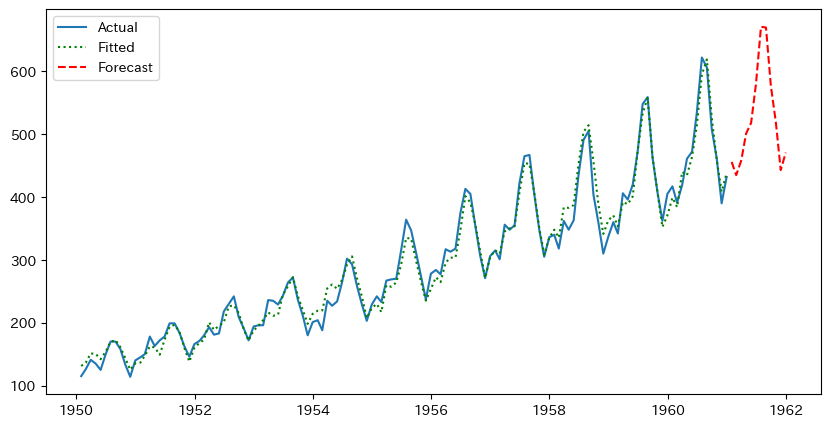

In [19]:
#
# code 3.18
#

# 学習データ期間の予測値を取得
fitted = pd.Series(
    model.predict(df_tbl[['t', 'lag_1', 'lag_12']]),
    index=df_tbl.index
)

# 結果をプロット
plot_prediction_results(y, fitted, forecast)

## 3.4 ARIMA 系の時系列回帰モデル

### 3.4.1 ARIMAXモデル

In [20]:
#
# code 3.19
#

# データフレームをコピー
df_tbl = df_ap.copy()

# トレンド特徴量の追加
df_tbl['t'] = np.arange(len(df_tbl))

# 三角関数特徴量を追加
df_tbl = add_fourier_terms(df_tbl, num=5, seasonal=12)

In [21]:
#
# code 3.20
#

from pmdarima.arima import auto_arima

# 外生変数Xと目的変数yを抽出し設定
X = df_tbl.drop(columns=['y'], axis=1)
y = df_tbl['y']

# AutoARIMAモデルを使い学習
model = auto_arima(
    y,              # 目的変数
    X=X,            # 外生変数
    seasonal=False, # 季節変動なし
)

# モデルの概要を出力 (次数と係数、切片のみ)
sum_model = model.summary() 
print(pd.DataFrame(sum_model.tables[1]).iloc[:, :5])

            0           1          2          3       4
0                    coef    std err          z   P>|z|
1   intercept     19.9553      5.937      3.361   0.001
2           t      2.6641      0.077     34.736   0.000
3       sin_1      5.0545      7.161      0.706   0.480
4       cos_1    -45.0646      7.962     -5.660   0.000
5       sin_2     14.2601      3.778      3.775   0.000
6       cos_2     18.7007      2.751      6.798   0.000
7       sin_3     -8.5757      1.984     -4.323   0.000
8       cos_3     -3.6830      1.808     -2.038   0.042
9       sin_4     -6.8396      1.307     -5.233   0.000
10      cos_4      3.4602      1.575      2.197   0.028
11      sin_5     -5.8506      1.254     -4.667   0.000
12      cos_5      1.9125      1.187      1.611   0.107
13      ar.L1      1.3861      0.194      7.149   0.000
14      ar.L2     -0.6084      0.145     -4.192   0.000
15      ma.L1     -0.4046      0.271     -1.492   0.136
16     sigma2    223.4662     26.620      8.395 

In [22]:
#
# code 3.21
#

# 現在のデータの最終時点を取得
last_t = df_tbl['t'].max()

# 予測期間の日付インデックスを作成
forecast_dates = pd.date_range(
    start=y.index[-1] + pd.DateOffset(months=1),
    periods=12,  # 12ヶ月分
    freq='M'     # 月次データ
)

# 予測用の外生変数Xを作成
X_forecast = pd.DataFrame(index=forecast_dates)
X_forecast['t'] = np.arange(last_t + 1, last_t + 13)
X_forecast = add_fourier_terms(
    X_forecast, num=5, seasonal=12, 
    t_start=last_t + 1
)

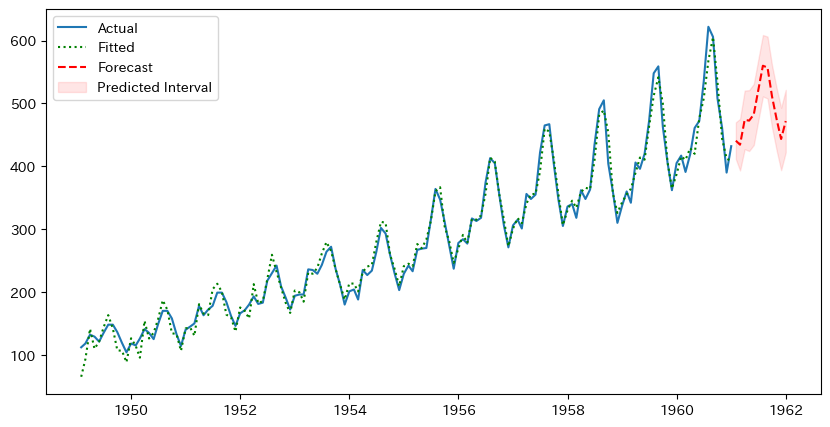

In [23]:
#
# code 3.22
#

# 学習データ期間の予測値を取得
fitted = model.predict_in_sample(X=X)

# 将来12か月の予測値と95%予測区間を取得
forecast, conf = model.predict(
    n_periods=12, 
    X=X_forecast, 
    return_conf_int=True
)

# 結果をプロット
plot_prediction_results(y, fitted, forecast, conf)

### 3.4.2 RegARIMAモデル

In [24]:
#
# code 3.23
#

from sklearn.base import BaseEstimator, RegressorMixin
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression

class RegARIMAModel(BaseEstimator, RegressorMixin):

    # RegARIMAモデルクラスを初期化
    def __init__(self, 
        regressor=LinearRegression, # scikit-learn回帰モデルクラス
        **kwargs,                   # 回帰モデルクラスのハイパーパラメータ
    ):
        self.reg_model = regressor(**kwargs) 
        self.arima_model = None
        self.residuals = None

    # モデルをデータに学習させる
    def fit(self, 
        X,                          # 外生変数
        y,                          # 目的変数
    ):
        # 回帰問題のモデルで学習
        self.reg_model.fit(X, y)
        
        # 回帰問題のモデルの残差を計算
        pred = self.reg_model.predict(X)
        self.residuals = y - pred

        # 残差に対してauto_arimaを実行
        self.arima_model = auto_arima(self.residuals)

    # モデルを使って予測する
    def predict(self, 
        X,                          # 未来の外生変数
        n_periods=0,                # 予測期間
    ):
        # 回帰問題のモデルでの予測
        reg_pred = self.reg_model.predict(X)

        # ARIMAモデルでの未来予測
        if n_periods > 0:
            arima_pred = self.arima_model.predict(
                n_periods=n_periods)
        else:
            arima_pred = self.arima_model.predict_in_sample()

        # 回帰問題のモデルの予測とARIMAの予測の和を返す
        return reg_pred + arima_pred.iloc[0]

In [25]:
#
# code 3.24
#

from sklearn.ensemble import RandomForestRegressor

# 外生変数Xと目的変数yの設定
X = df_tbl.drop(columns=['y'], axis=1)
y = df_tbl['y']

# ハイパーパラメータの設定
params = {
    'n_estimators': 1000000, # 木の数
    'max_depth': 5,          # 木の最大の深さ
    'random_state': 42,
}

# モデルの学習
model = RegARIMAModel(
    regressor=RandomForestRegressor, 
    **params
)
model.fit(X, y)

In [26]:
#
# code 3.25
#

print(model.arima_model)

 ARIMA(2,0,1)(0,0,0)[0] intercept


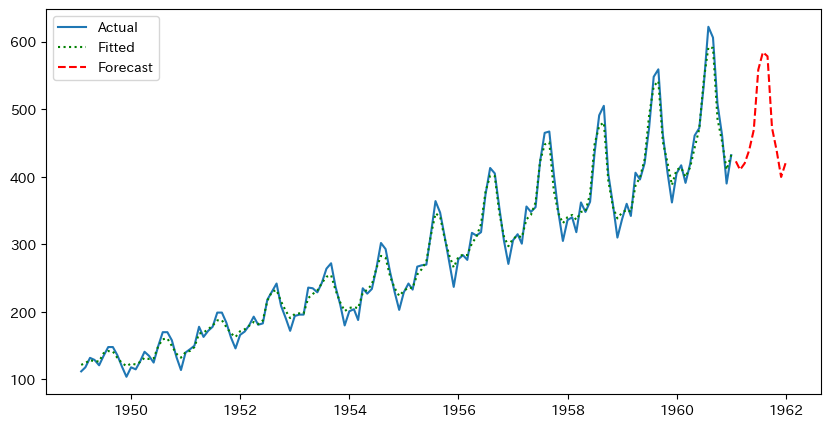

In [27]:
#
# code 3.26
#

# 学習データ期間の予測値を取得
fitted = pd.Series(
    model.predict(X=X), 
    index=y.index
)

# 将来12か月の予測値を取得
forecast = pd.Series(
    model.predict(X=X_forecast, n_periods=12), 
    index=forecast_dates
)

# 結果をプロット
plot_prediction_results(y, fitted, forecast)

## 3.5 状態空間モデル

In [28]:
#
# code 3.27
#

# 外生変数Xと目的変数yの設定
X = df_tbl.drop(columns=['y'], axis=1)
y = df_tbl['y']

In [29]:
#
# code 3.28
#

from statsmodels.tsa.statespace.structural import UnobservedComponents

# モデルの構築
model = UnobservedComponents(
    y, # 観測された目的変数のデータ
    exog=X['t'],                    # 外生変数
    level='local level',            # ローカルレベルモデルを指定
    freq_seasonal=[{'period': 12}], # 季節成分を指定
)
res = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40771D+00    |proj g|=  1.63035D-02

At iterate    5    f=  4.11264D+00    |proj g|=  9.10590D-02

At iterate   10    f=  3.61315D+00    |proj g|=  4.89284D-02

At iterate   15    f=  3.58107D+00    |proj g|=  1.15280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     41      1     0     0   6.955D-06   3.581D+00
  F =   3.5810699515237681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
 This pr

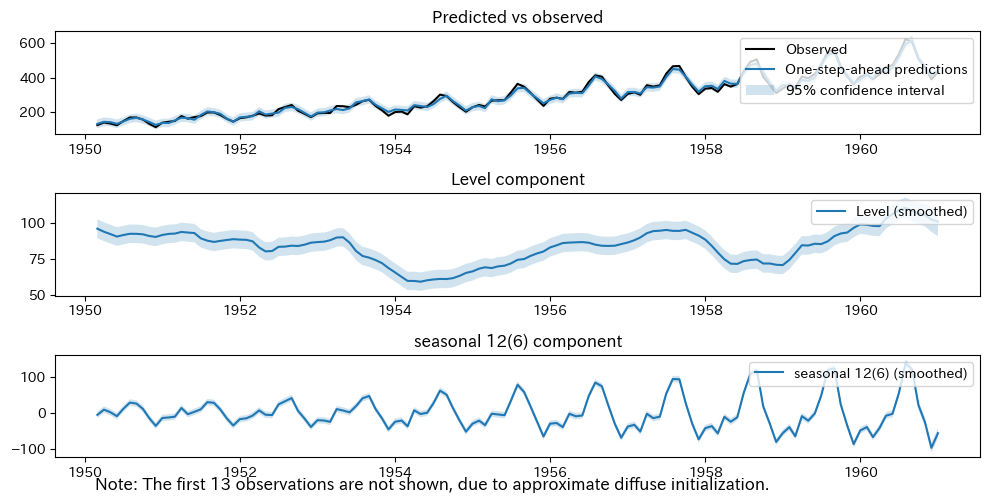

In [30]:
#
# code 3.29
#

# 結果のプロット
res.plot_components(figsize=(10,5))
plt.tight_layout()
plt.show()

In [31]:
#
# code 3.30
#

print(pd.DataFrame(res.summary().tables[1]).iloc[:, :5])

                            0           1          2          3       4
0                                    coef    std err          z   P>|z|
1            sigma2.irregular   7.908e-09     11.174   7.08e-10   1.000
2                sigma2.level     15.7107      4.871      3.225   0.001
3  sigma2.freq_seasonal_12(6)      1.2114      0.270      4.484   0.000
4                      beta.t      2.7077      0.360      7.513   0.000


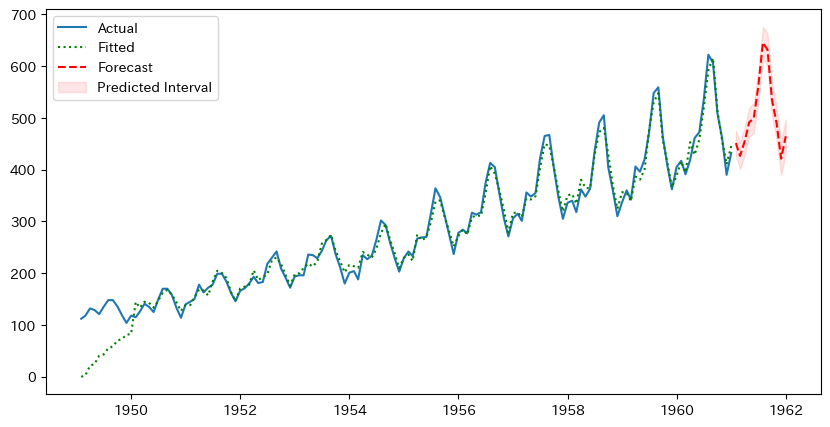

In [32]:
#
# code 3.31
#

# 学習データ期間の予測値を取得
fitted = res.fittedvalues

# 将来12か月の予測
forecast_results = res.get_forecast(
    steps=12,            # 予測期間（12ヶ月分）
    exog=X_forecast['t'] # 外生変数
)  

# 予測値を取得
forecast = forecast_results.predicted_mean

# 95%予測区間を取得
conf = forecast_results.conf_int(alpha=0.05).values

# 結果をプロット
plot_prediction_results(df_ap.y, fitted, forecast, conf)

## 3.6 ベイズ時系列モデル

### 3.6.1 Prophetによるベイズ時系列モデル

In [33]:
#
# code 3.32
#

prophet_df = df_tbl.reset_index()
prophet_df = prophet_df.rename(columns={'index': 'ds'})
prophet_df = prophet_df[['ds', 'y', 't']]

print(prophet_df)

            ds      y    t
0   1949-01-31  112.0    0
1   1949-02-28  118.0    1
2   1949-03-31  132.0    2
3   1949-04-30  129.0    3
4   1949-05-31  121.0    4
..         ...    ...  ...
139 1960-08-31  606.0  139
140 1960-09-30  508.0  140
141 1960-10-31  461.0  141
142 1960-11-30  390.0  142
143 1960-12-31  432.0  143

[144 rows x 3 columns]


In [34]:
#
# code 3.33
#

from prophet import Prophet

# モデルの設定
model = Prophet(
    yearly_seasonality=True, # 年間季節成分
    interval_width=0.95,     # 95%予測区間
    mcmc_samples=5000        # MCMCサンプリングのサンプル数
)

# 外生変数の追加
model.add_regressor('t')     # トレンド変数を外生変数として追加

# 学習
model.fit(prophet_df)

In [35]:
#
# code 3.34
#

# 予測対象期間を含めたデータフレームを生成
future = model.make_future_dataframe(
    periods=12, # 予測期間(12ヶ月) 
    freq='MS'   # 予測期間の間隔(月間)
)
# トレンド特徴量の追加
future['t'] = np.arange(len(future))

# 予測
forecast = model.predict(future)

In [36]:
#
# code 3.35
#

# 予測値の表示
print(forecast[[
    'ds',             # 日付
    'yhat',           # 予測値
    'yhat_lower',     # 95%予測区間の下限
    'yhat_upper',     # 95%予測区間の上限
    'trend',          # トレンド成分
    'additive_terms', # 加法的変動成分
    'yearly',         # 年間季節成分
    't',              # トレンド特徴量
]])

            ds        yhat  yhat_lower  yhat_upper         trend  \
0   1949-01-31   73.082904   13.039405  132.106255  21659.180002   
1   1949-02-28   66.842268   11.093414  123.832353  21659.608402   
2   1949-03-31   99.146289   42.674567  158.203700  21660.082702   
3   1949-04-30   97.075858   39.492884  156.272629  21660.541702   
4   1949-05-31  100.453389   42.123716  158.606386  21661.016003   
..         ...         ...         ...         ...           ...   
151 1961-08-01  544.793443  466.640606  622.979110  21729.024552   
152 1961-09-01  561.795635  483.574963  643.234951  21729.498853   
153 1961-10-01  496.233108  416.134755  575.122810  21729.957853   
154 1961-11-01  469.391453  388.264076  545.870972  21730.432153   
155 1961-12-01  430.813956  352.291973  507.275297  21730.891154   

     additive_terms     yearly             t  
0     -21586.097098 -24.183381 -21561.913717  
1     -21592.766134 -32.792635 -21559.973499  
2     -21560.936413  -3.111012 -21557.8254

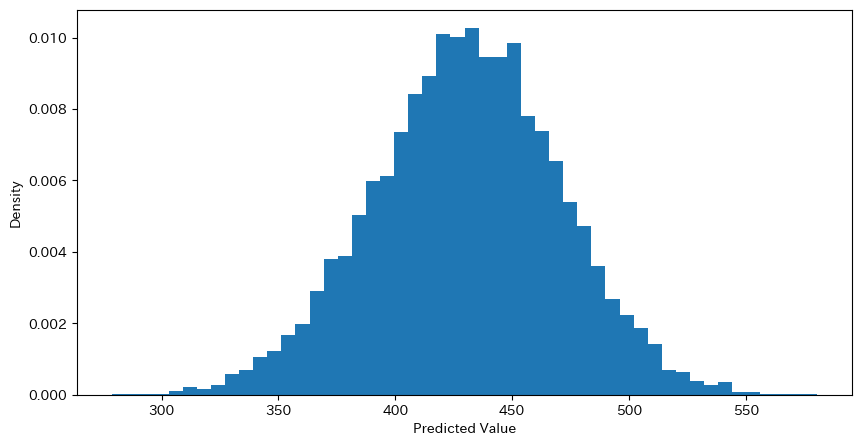

Sampling Statistics:
Mean: 430.54
Std: 39.95
95% Predicted Interval: [350.26, 507.49]


In [37]:
#
# code 3.36
#

# 予測対象期間の最後の日付（1961年12月）の事後分布からサンプリング
sample_forecast = model.predictive_samples(forecast)
y_samples = sample_forecast['yhat'][-1, :] 

# 予測分布（事後分布）のヒストグラム
plt.figure(figsize=(10, 5))
plt.hist(y_samples, bins=50, density=True)
plt.xlabel('Predicted Value')
plt.ylabel('Density')
plt.show()

# 予測分布（事後分布）の基本統計量
print("Sampling Statistics:")
print(f"Mean: {y_samples.mean():.2f}")
print(f"Std: {y_samples.std():.2f}")
lower = np.percentile(y_samples, 2.5)
upper = np.percentile(y_samples, 97.5)
print(f"95% Predicted Interval: [{lower:.2f}, {upper:.2f}]")

In [38]:
#
# code 3.37
#

from prophet.plot import plot_plotly

# 予測結果のプロット
fig = plot_plotly(model, forecast) 
fig.update_layout(showlegend=True)
fig.show()

In [39]:
#
# code 3.38
#

from prophet.plot import plot_components_plotly 

# 時系列成分のプロット
fig = plot_components_plotly(model, forecast)
fig.show()

### 3.6.2 PyMCによるベイズ時系列モデル

In [40]:
#
# code 3.39
#

with pm.Model() as model:
    
# 事前分布
# 切片αは平均0、標準偏差1 の正規分布に従うと仮定
alpha = pm.Normal("alpha", mu=0, sigma=1)

# 傾きβも同様に、平均0、標準偏差1 の正規分布に従うと仮定
beta = pm.Normal("beta", mu=0, sigma=1)

# 期待値 mu を alpha + beta * x で定義
mu = alpha + beta * x

# 尤度関数
# 観測データy を期待値mu、標準偏差1 の正規分布に従うと仮定
y_obs = pm.Normal("y_obs", mu=mu, sigma=1, observed=y)

# 事後分布（MCMC サンプリング）
trace = pm.sample(
    draws = 10000, # サンプリング数
    tune = 1000,   # バーイン期間
    chains = 4,    # チェーン数（独立したマルコフ連鎖の数）
)

In [41]:
#
# code 3.40
#

# 外生変数Xと目的変数yの設定
X = df_tbl.drop(columns=['y'], axis=1)
y = df_tbl['y']

In [42]:
#
# code 3.41
#

import pymc as pm

# データフレームを numpy array に変換
X_values = X.values

with pm.Model() as model:

    # 事前分布
    # 切片
    intercept = pm.Normal('intercept', mu=300, sigma=100)  
    # 傾き
    slope = pm.Normal('slope', mu=0, sigma=1)  
    # 三角関数特徴量の係数ベクトル
    fourier_coef = pm.Normal(
        'fourier_coef', 
        mu=0, 
        sigma=10, 
        shape=len(X.columns)-1
    )  
    # 期待値
    mu = intercept \
        + slope * X_values[:, 0] \
        + pm.math.dot(X_values[:, 1:], fourier_coef)

    # 尤度（対数正規分布を仮定）
    sigma = pm.HalfNormal('sigma', sigma=20)
    obs = pm.Lognormal(
        'y_obs', 
        mu=mu, 
        sigma=sigma, 
        observed=y
    )

    # 事後分布（MCMCサンプリング）
    trace = pm.sample(
        draws = 10000,             # サンプリング数
        tune = 1000,               # バーイン期間
        chains = 4,                # チェーン数（独立したマルコフ連鎖の数）
        return_inferencedata=True, # arvizを使用する場合はTrue
    )

                  mean     sd  hdi_2.5%  hdi_97.5%
intercept        4.822  0.010     4.803      4.841
slope            0.010  0.000     0.010      0.010
fourier_coef[0]  0.028  0.007     0.014      0.042
fourier_coef[1] -0.147  0.007    -0.161     -0.134
fourier_coef[2]  0.059  0.007     0.045      0.073
fourier_coef[3]  0.057  0.007     0.042      0.070
fourier_coef[4] -0.027  0.007    -0.041     -0.014
fourier_coef[5] -0.009  0.007    -0.023      0.005
fourier_coef[6] -0.032  0.007    -0.046     -0.018
fourier_coef[7]  0.011  0.007    -0.003      0.025
fourier_coef[8] -0.021  0.007    -0.035     -0.007
fourier_coef[9]  0.006  0.007    -0.008      0.020
sigma            0.060  0.004     0.053      0.067


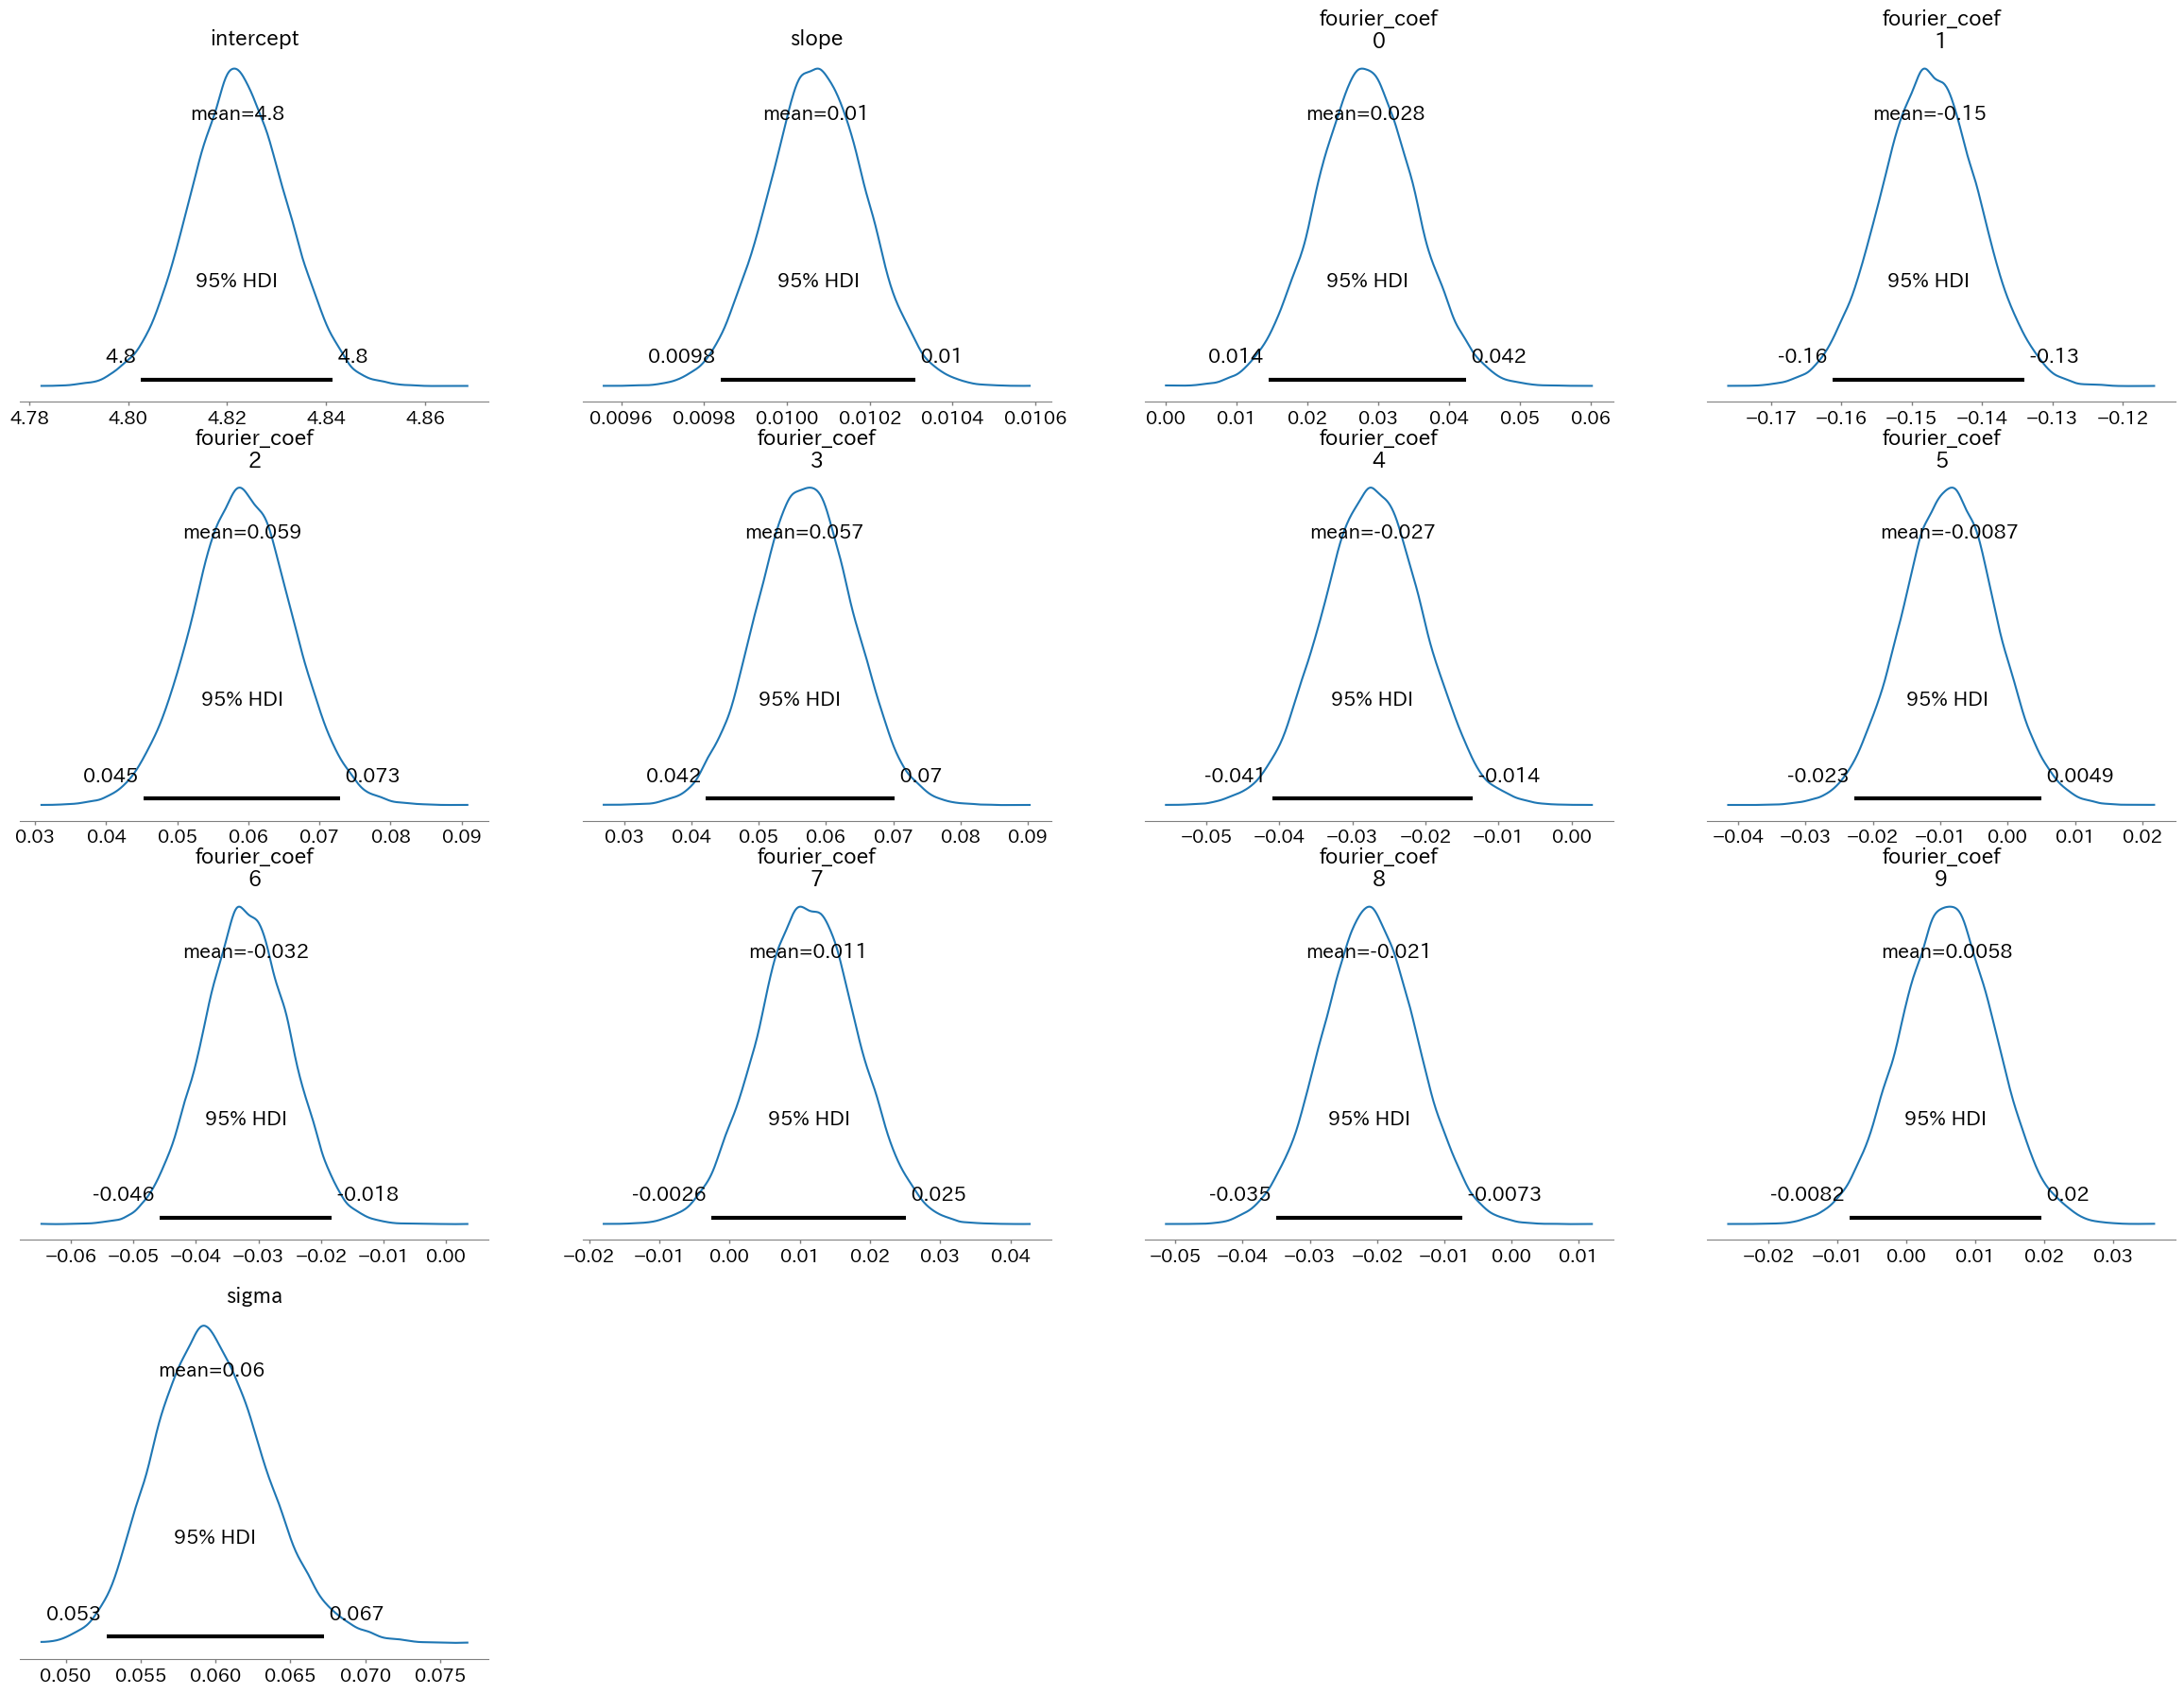

In [43]:
#
# code 3.42
#

import arviz as az

# 各パラメータの事後分布
print(az.summary(trace, hdi_prob=0.95, kind="stats"))
az.plot_posterior(trace, hdi_prob=0.95)
plt.show()

In [44]:
#
# code 3.43
#

# 目的変数yの事後分布
with model:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, 
        var_names=['y_obs'], 
        random_seed=0
    )

In [45]:
#
# code 3.44
#

# 事後分布の基本統計量
fitted_summary = az.summary(
    posterior_predictive, 
    hdi_prob=0.95, 
    kind="stats",
    group="posterior_predictive"
)

print(fitted_summary)

               mean      sd  hdi_2.5%  hdi_97.5%
y_obs[0]    114.591   7.166   101.036    129.100
y_obs[1]    112.667   7.073    98.947    126.683
y_obs[2]    130.259   8.137   114.488    146.216
y_obs[3]    126.788   7.975   111.418    142.602
y_obs[4]    128.535   8.065   113.596    145.081
...             ...     ...       ...        ...
y_obs[139]  617.842  38.697   541.531    693.289
y_obs[140]  543.673  33.944   477.800    610.938
y_obs[141]  475.283  29.808   418.746    535.162
y_obs[142]  418.396  26.214   368.744    471.263
y_obs[143]  471.058  29.580   413.468    529.703

[144 rows x 4 columns]


In [46]:
#
# code 3.45
#

# DataFrameをnumpy arrayに変換
new_X = X_forecast.values  

# 予測分布の計算
with model:

    # 期待値
    new_mu = intercept + slope * new_X[:, 0]
    for i in range(len(X.columns)-1):
        new_mu = new_mu + fourier_coef[i] * new_X[:, i+1]

    # 予測分布の定義
    y_forecast = pm.Lognormal(
        'y_forecast', 
        mu=new_mu, 
        sigma=sigma
    )

    # 事後予測をサンプリング
    new_pp = pm.sample_posterior_predictive(
        trace, 
        var_names=["y_forecast"], 
        random_seed=42
    )

In [47]:
#
# code 3.46
#

# 予測値の基礎統計量
forecast_summary = az.summary(
    new_pp, 
    hdi_prob=0.95, 
    kind="stats", 
    group="posterior_predictive"
)

print(forecast_summary)

                   mean      sd  hdi_2.5%  hdi_97.5%
y_forecast[0]   489.073  30.638   429.861    549.421
y_forecast[1]   480.149  30.241   420.810    539.194
y_forecast[2]   555.709  35.041   488.920    626.358
y_forecast[3]   540.621  34.143   475.641    609.260
y_forecast[4]   548.114  34.264   482.859    617.191
y_forecast[5]   621.903  38.743   547.406    699.004
y_forecast[6]   701.282  44.044   614.684    786.882
y_forecast[7]   697.697  43.454   614.310    784.767
y_forecast[8]   613.178  38.538   538.597    689.158
y_forecast[9]   536.574  33.677   470.805    603.553
y_forecast[10]  472.332  29.684   414.158    530.439
y_forecast[11]  531.385  33.478   466.120    597.227


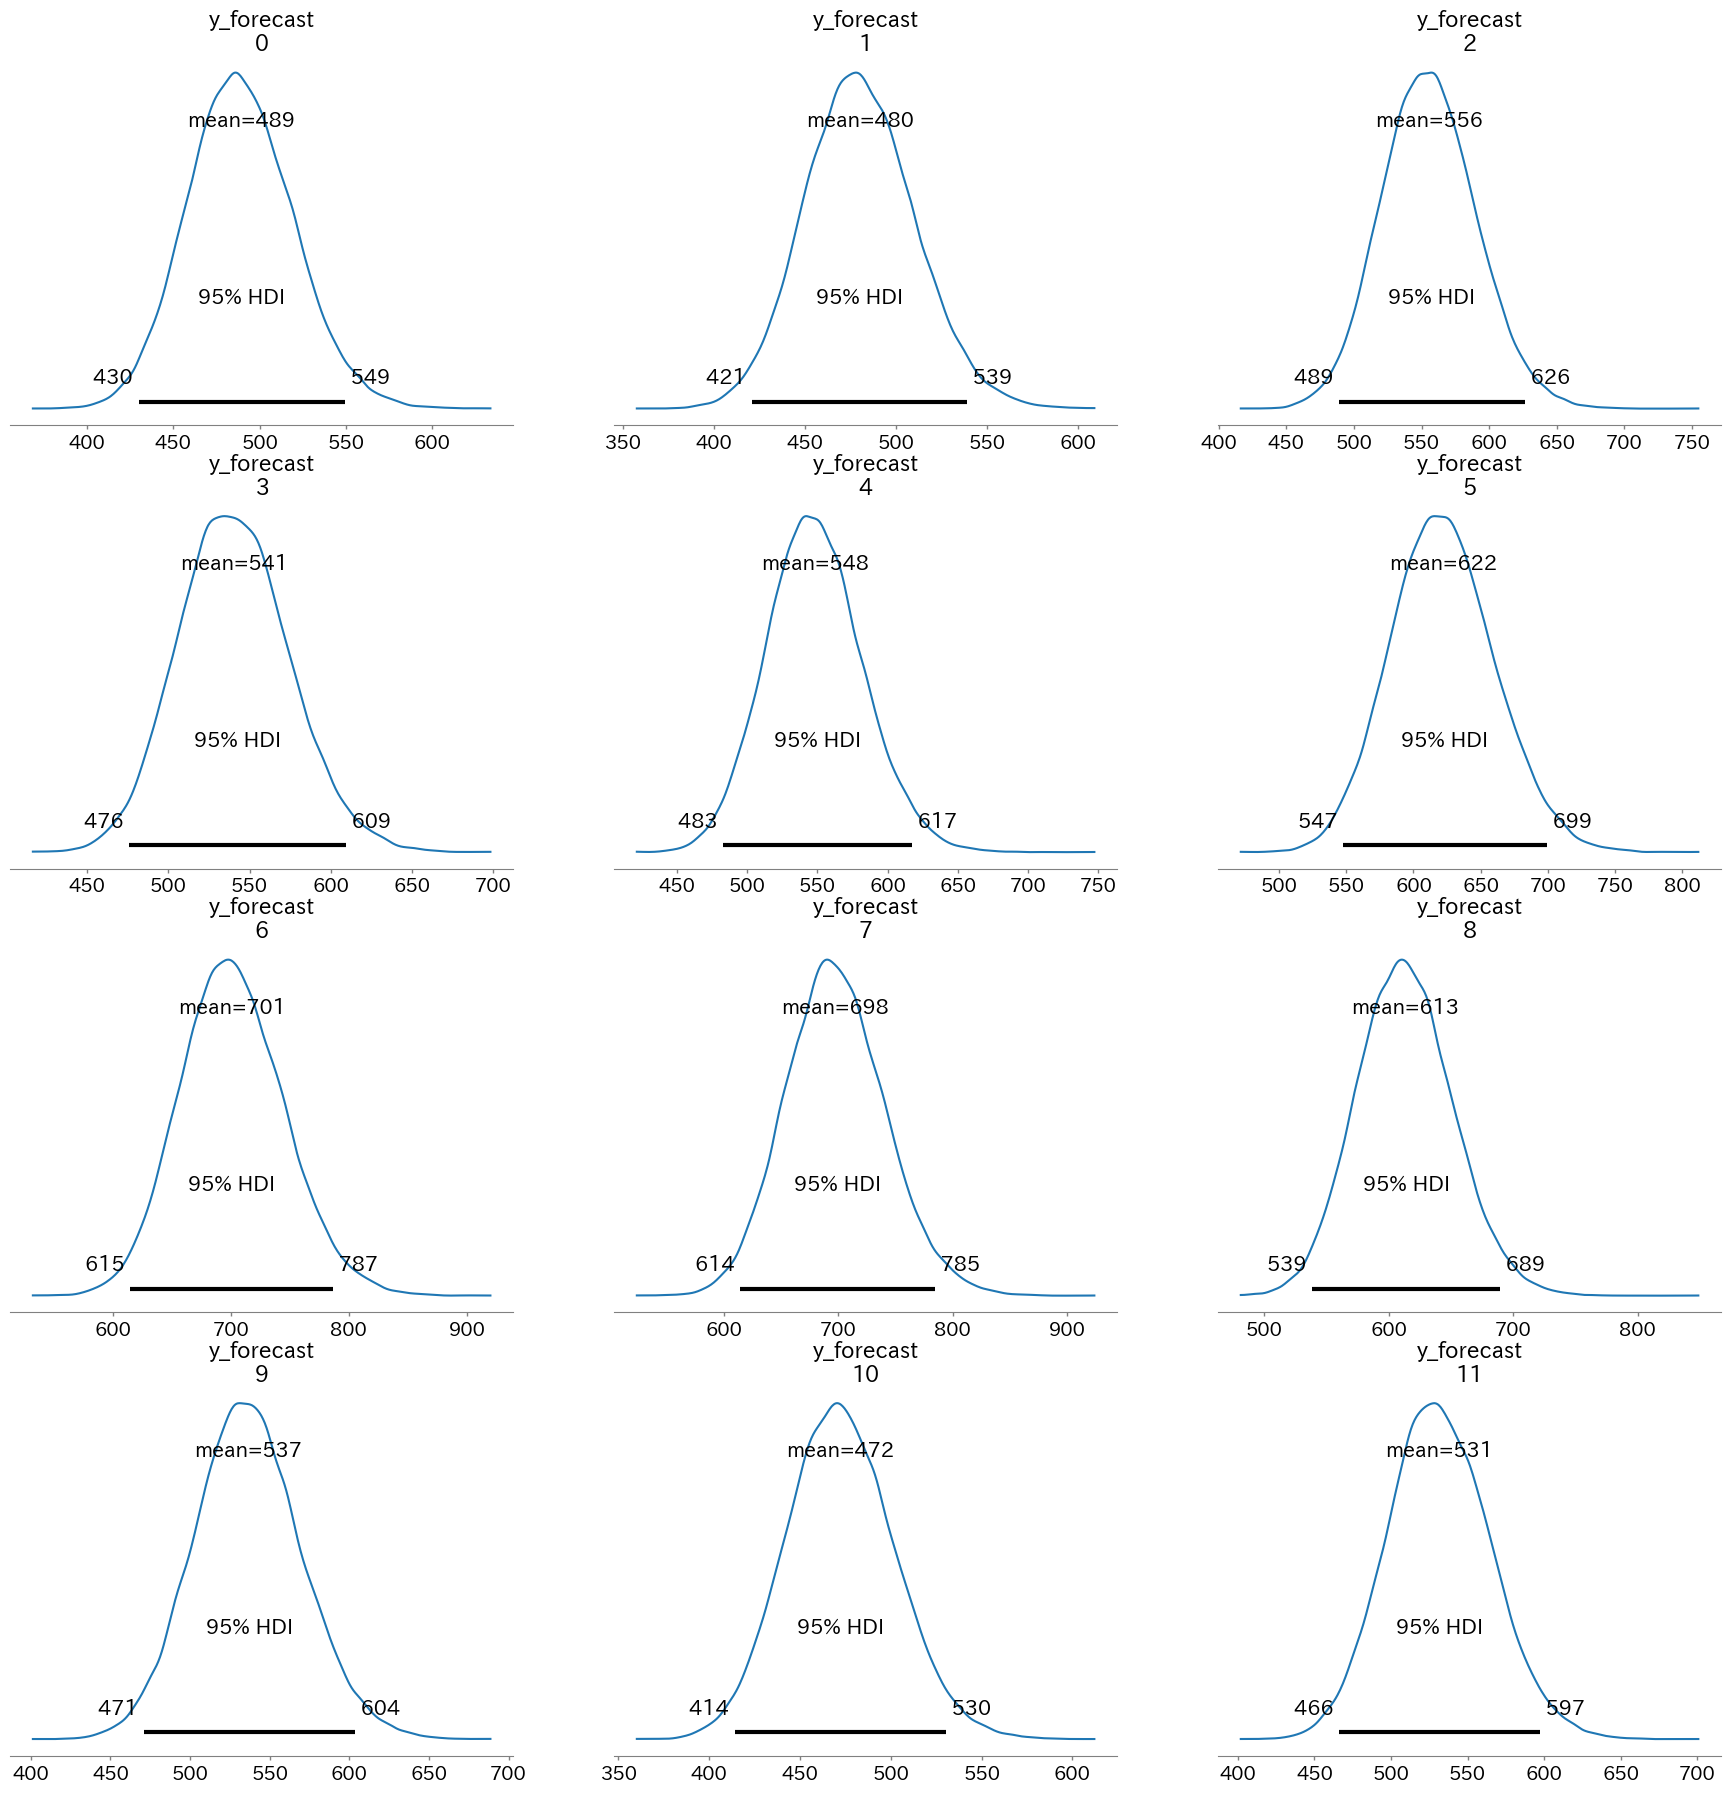

In [48]:
#
# code 3.47
#

# 予測分布のプロット
pred_samples = new_pp['posterior_predictive']['y_forecast']
az.plot_posterior(
    pred_samples, 
    hdi_prob=0.95)
plt.show()

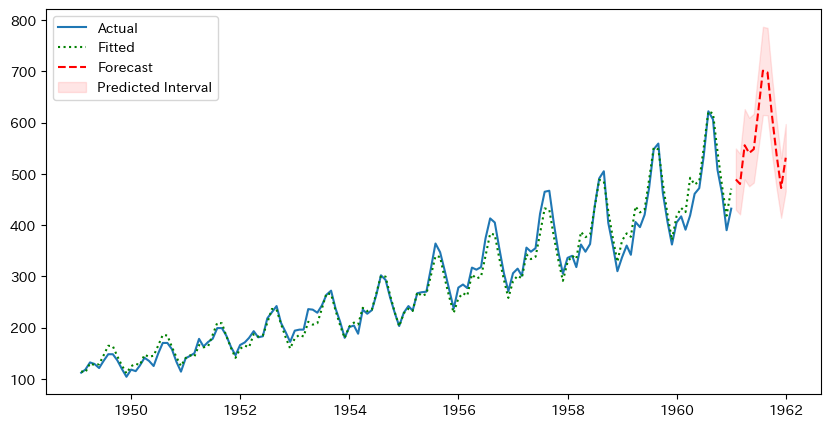

In [49]:
#
# code 3.48
#

# 学習データ期間の予測値を取得
fitted = pd.Series(
    fitted_summary['mean'].values,
    index=df_ap.index
)

# 予測期間の予測値
forecast = pd.Series(
    forecast_summary['mean'].values,
    index=X_forecast.index
)

# 予測期間の予測区間
conf = forecast_summary[[
    'hdi_2.5%',
    'hdi_97.5%'
]].values

# 予測結果のプロット
plot_prediction_results(y, fitted, forecast, conf)